In [1]:
import h5py
import scipy
import numpy as np
import torch

In [2]:
base_dir = "/home/mafzhang/code/Project/CHLA-Imputation-and-Prediction-for-Bay/log/prediction/PRE/"

In [3]:
label = np.load("/home/mafzhang/data/PRE/8d/trues.npy")
label_masks = np.load("/home/mafzhang/data/PRE/8d/true_masks.npy")

In [4]:
prediction_xg = np.load(base_dir+"XGBoost/with_imputation/prediction.npy", allow_pickle=True)
prediction_xg_eof = np.load(base_dir+"XGBoost/with_imputation_eof/prediction_0.npy", allow_pickle=True)
prediction_xg_wo = np.load(base_dir+"XGBoost/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_mtgnn = np.load(base_dir+"MTGNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_mtgnn_eof = np.load(base_dir+"MTGNN/with_imputation_eof/prediction_0.npy", allow_pickle=True)
prediction_mtgnn_wo = np.load(base_dir+"MTGNN/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_tsmixer = np.load(base_dir+"TSMixer/with_imputation/prediction.npy", allow_pickle=True)
prediction_tsmixer_eof = np.load(base_dir+"TSMixer/with_imputation_eof/prediction_0.npy", allow_pickle=True)
prediction_tsmixer_wo = np.load(base_dir+"TSMixer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_crossformer = np.load(base_dir+"CrossFormer/with_imputation/prediction.npy", allow_pickle=True)
prediction_crossformer_eof = np.load(base_dir+"CrossFormer/with_imputation_eof/prediction_0.npy", allow_pickle=True)
prediction_crossformer_wo = np.load(base_dir+"CrossFormer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_iTransformer = np.load(base_dir+"iTransformer/with_imputation/prediction.npy", allow_pickle=True)
prediction_iTransformer_eof = np.load(base_dir+"iTransformer/with_imputation_eof/prediction_0.npy", allow_pickle=True)
prediction_iTransformer_wo = np.load(base_dir+"iTransformer/without_imputation/prediction_0.npy", allow_pickle=True)
prediction_predrnn = np.load(base_dir+"PredRNN/with_imputation/prediction.npy", allow_pickle=True)
prediction_predrnn_eof = np.load(base_dir+"PredRNN/with_imputation_eof/prediction_0.npy", allow_pickle=True)
prediction_predrnn_wo = np.load(base_dir+"PredRNN/without_imputation/prediction_0.npy", allow_pickle=True)


In [5]:
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)

In [6]:
prediction_xg = torch.from_numpy(prediction_xg).squeeze().median(1).values
prediction_xg_eof = torch.from_numpy(prediction_xg_eof).squeeze()
prediction_xg_wo = torch.from_numpy(prediction_xg_wo).squeeze()
prediction_tsmixer = torch.from_numpy(prediction_tsmixer).squeeze().median(1).values
prediction_tsmixer_eof = torch.from_numpy(prediction_tsmixer_eof).squeeze()
prediction_tsmixer_wo = torch.from_numpy(prediction_tsmixer_wo).squeeze()
prediction_mtgnn = torch.from_numpy(prediction_mtgnn).squeeze().median(1).values
prediction_mtgnn_eof = torch.from_numpy(prediction_mtgnn_eof).squeeze()
prediction_mtgnn_wo = torch.from_numpy(prediction_mtgnn_wo).squeeze()
prediction_crossformer = torch.from_numpy(prediction_crossformer).squeeze().median(1).values
prediction_crossformer_eof = torch.from_numpy(prediction_crossformer_eof).squeeze()
prediction_crossformer_wo = torch.from_numpy(prediction_crossformer_wo).squeeze()
prediction_iTransformer = torch.from_numpy(prediction_iTransformer).squeeze().median(1).values
prediction_iTransformer_eof = torch.from_numpy(prediction_iTransformer_eof).squeeze()
prediction_iTransformer_wo = torch.from_numpy(prediction_iTransformer_wo).squeeze()
prediction_predrnn = torch.from_numpy(prediction_predrnn).squeeze().median(1).values
prediction_predrnn_eof = torch.from_numpy(prediction_predrnn_eof).squeeze()
prediction_predrnn_wo = torch.from_numpy(prediction_predrnn_wo).squeeze()


In [7]:
mse_xg = (((prediction_xg - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_xg_eof = (((prediction_xg_eof - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_xg_wo = (((prediction_xg_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)


mse_tsmixer = (((prediction_tsmixer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_tsmixer_eof = (((prediction_tsmixer_eof - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_tsmixer_wo = (((prediction_tsmixer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)


mse_crossformer = (((prediction_crossformer- label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_crossformer_eof = (((prediction_crossformer_eof - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_crossformer_wo = (((prediction_crossformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mse_mtgnn = (((prediction_mtgnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_mtgnn_eof = (((prediction_mtgnn_eof - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_mtgnn_wo = (((prediction_mtgnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)


mse_iTransformer = (((prediction_iTransformer - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_iTransformer_eof = (((prediction_iTransformer_eof - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_iTransformer_wo = (((prediction_iTransformer_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)


mse_predrnn = (((prediction_predrnn - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_predrnn_eof = (((prediction_predrnn_eof - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mse_predrnn_wo = (((prediction_predrnn_wo - label)*label_masks)**2).sum([0,1])/(label_masks.sum([0,1])+1e-5)


In [8]:
mse_xg_wo[mse_xg_wo==0]=np.nan
mse_xg_eof[mse_xg_eof==0]=np.nan
mse_xg[mse_xg==0]=np.nan
mse_crossformer_wo[mse_crossformer_wo==0]=np.nan
mse_crossformer_eof[mse_crossformer_eof==0]=np.nan
mse_crossformer[mse_crossformer==0]=np.nan
mse_mtgnn_wo[mse_mtgnn_wo==0]=np.nan
mse_mtgnn_eof[mse_mtgnn_eof==0]=np.nan
mse_mtgnn[mse_mtgnn==0]=np.nan
mse_tsmixer_wo[mse_tsmixer_wo==0]=np.nan
mse_tsmixer_eof[mse_tsmixer_eof==0]=np.nan
mse_tsmixer[mse_tsmixer==0]=np.nan
mse_iTransformer_wo[mse_iTransformer_wo==0]=np.nan
mse_iTransformer_eof[mse_iTransformer_eof==0]=np.nan
mse_iTransformer[mse_iTransformer==0]=np.nan
mse_predrnn_wo[mse_predrnn_wo==0]=np.nan
mse_predrnn_eof[mse_predrnn_eof==0]=np.nan
mse_predrnn[mse_predrnn==0]=np.nan

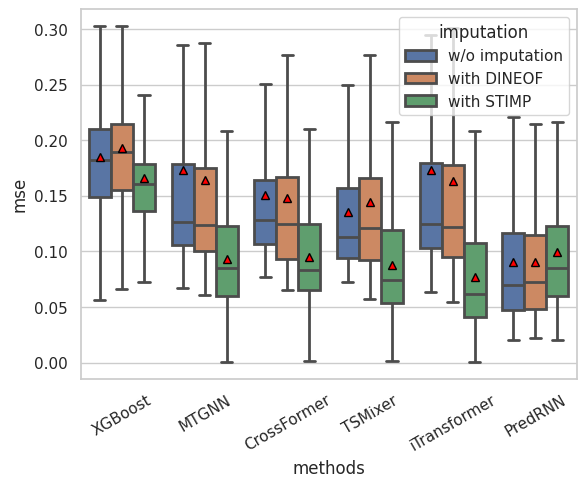

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
category = []
category.extend(['XGBoost' for i in range(4443)])
category.extend(['XGBoost' for i in range(4443)])
category.extend(['XGBoost' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
imputation = []
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])

data = {'mse': np.concatenate([mse_xg_wo.numpy(), mse_xg_eof.numpy(), mse_xg.numpy(), mse_mtgnn_wo.numpy(), mse_mtgnn_eof.numpy(), mse_mtgnn.numpy(), mse_crossformer_wo.numpy(), mse_crossformer_eof.numpy(), mse_crossformer.numpy(), mse_tsmixer_wo.numpy(), mse_tsmixer_eof.numpy(), mse_tsmixer.numpy(), mse_iTransformer_wo.numpy(), mse_iTransformer_eof.numpy(), mse_iTransformer.numpy(), mse_predrnn_wo.numpy(), mse_predrnn_eof.numpy(), mse_predrnn.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mse', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})

In [11]:
mae_xg = ((np.abs(prediction_xg - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_xg_wo = ((np.abs(prediction_xg_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_xg_eof = ((np.abs(prediction_xg_eof - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mae_tsmixer = ((np.abs(prediction_tsmixer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_tsmixer_wo = ((np.abs(prediction_tsmixer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_tsmixer_eof = ((np.abs(prediction_tsmixer_eof - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mae_crossformer = ((np.abs(prediction_crossformer- label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_crossformer_wo = ((np.abs(prediction_crossformer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_crossformer_eof = ((np.abs(prediction_crossformer_eof - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mae_mtgnn = ((np.abs(prediction_mtgnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_mtgnn_wo = ((np.abs(prediction_mtgnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_mtgnn_eof = ((np.abs(prediction_mtgnn_eof - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mae_iTransformer = ((np.abs(prediction_iTransformer - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_iTransformer_wo = ((np.abs(prediction_iTransformer_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_iTransformer_eof = ((np.abs(prediction_iTransformer_eof - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)

mae_predrnn = ((np.abs(prediction_predrnn - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_predrnn_wo = ((np.abs(prediction_predrnn_wo - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)
mae_predrnn_eof = ((np.abs(prediction_predrnn_eof - label)*label_masks)).sum([0,1])/(label_masks.sum([0,1])+1e-5)

In [12]:
mae_xg_wo[mae_xg_wo==0]=np.nan
mae_xg_eof[mae_xg_eof==0]=np.nan
mae_xg[mae_xg==0]=np.nan
mae_crossformer_wo[mae_crossformer_wo==0]=np.nan
mae_crossformer_eof[mae_crossformer_eof==0]=np.nan
mae_crossformer[mae_crossformer==0]=np.nan
mae_mtgnn_wo[mae_mtgnn_wo==0]=np.nan
mae_mtgnn_eof[mae_mtgnn_eof==0]=np.nan
mae_mtgnn[mae_mtgnn==0]=np.nan
mae_tsmixer_wo[mae_tsmixer_wo==0]=np.nan
mae_tsmixer_eof[mae_tsmixer_eof==0]=np.nan
mae_tsmixer[mae_tsmixer==0]=np.nan
mae_iTransformer_wo[mae_iTransformer_wo==0]=np.nan
mae_iTransformer_eof[mae_iTransformer_eof==0]=np.nan
mae_iTransformer[mae_iTransformer==0]=np.nan
mae_predrnn_wo[mae_predrnn_wo==0]=np.nan
mae_predrnn_eof[mae_predrnn_eof==0]=np.nan
mae_predrnn[mae_predrnn==0]=np.nan

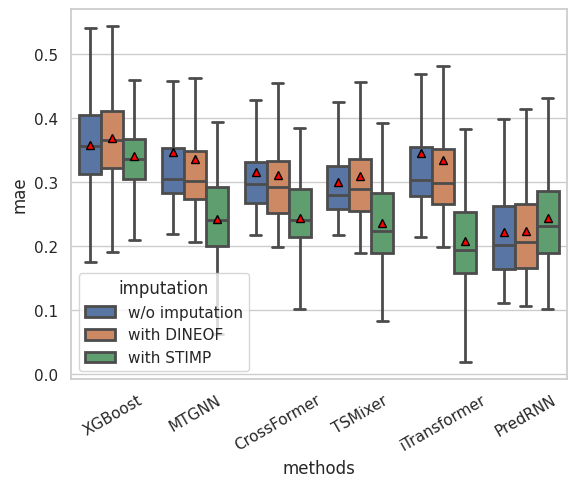

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
category = []
category.extend(['XGBoost' for i in range(4443)])
category.extend(['XGBoost' for i in range(4443)])
category.extend(['XGBoost' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['MTGNN' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['CrossFormer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['TSMixer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['iTransformer' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
category.extend(['PredRNN' for i in range(4443)])
imputation = []
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])
imputation.extend(['w/o imputation' for i in range(4443)])
imputation.extend(['with DINEOF' for i in range(4443)])
imputation.extend(['with STIMP' for i in range(4443)])

data = {'mae': np.concatenate([mae_xg_wo.numpy(), mae_xg_eof.numpy(), mae_xg.numpy(), mae_mtgnn_wo.numpy(), mae_mtgnn_eof.numpy(), mae_mtgnn.numpy(), mae_crossformer_wo.numpy(), mae_crossformer_eof.numpy(), mae_crossformer.numpy(), mae_tsmixer_wo.numpy(), mae_tsmixer_eof.numpy(), mae_tsmixer.numpy(), mae_iTransformer_wo.numpy(), mae_iTransformer_eof.numpy(), mae_iTransformer.numpy(), mae_predrnn_wo.numpy(), mae_predrnn_eof.numpy(), mae_predrnn.numpy()],0),
        'methods':category,
        'imputation':imputation}
data = pd.DataFrame.from_dict(data)
sns.set(style="whitegrid")
plt.xticks(rotation=30)



plt.xticks(rotation=30)
g = sns.boxplot(x='methods', y='mae', hue='imputation', linewidth=2,showfliers=False,showmeans=True,data=data,meanprops={
                       "markerfacecolor": "red",
                       "markeredgecolor": "black",
                       "markersize": "6"})